🟩 Cell 1: Install & Import Libraries

In [1]:
!pip install tensorflow numpy matplotlib --quiet



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing
import numpy as np
import matplotlib.pyplot as plt

🟩 Cell 2: Load IMDB Dataset

In [3]:
# Load IMDB dataset (pre-tokenized in Keras)
(X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=10000)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training samples: 25000
Test samples: 25000


🟩 Cell 3: Pad Sequences

In [4]:
# Pad sequences to the same length
maxlen = 200
X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

print("Shape of X_train:", X_train.shape)


Shape of X_train: (25000, 200)


🟩 Cell 4: Build LSTM Model

In [5]:
model_lstm = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=64, input_length=maxlen),
    layers.LSTM(64),
    layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.summary()


e:\Fourise\venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

🟩 Cell 5: Train the Model

In [6]:
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=3,
    batch_size=64,
    validation_data=(X_test, y_test)
)


Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 91ms/step - accuracy: 0.8079 - loss: 0.4162 - val_accuracy: 0.8667 - val_loss: 0.3145
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.9038 - loss: 0.2464 - val_accuracy: 0.8638 - val_loss: 0.3455
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.9290 - loss: 0.1897 - val_accuracy: 0.8614 - val_loss: 0.3268


🟩 Cell 6: Evaluate Model

In [7]:
loss, acc = model_lstm.evaluate(X_test, y_test, verbose=2)
print(f"\n✅ LSTM Test Accuracy: {round(acc * 100, 2)}%")


782/782 - 12s - 15ms/step - accuracy: 0.8614 - loss: 0.3268

✅ LSTM Test Accuracy: 86.14%


🟩 Cell 7: Plot Accuracy and Loss

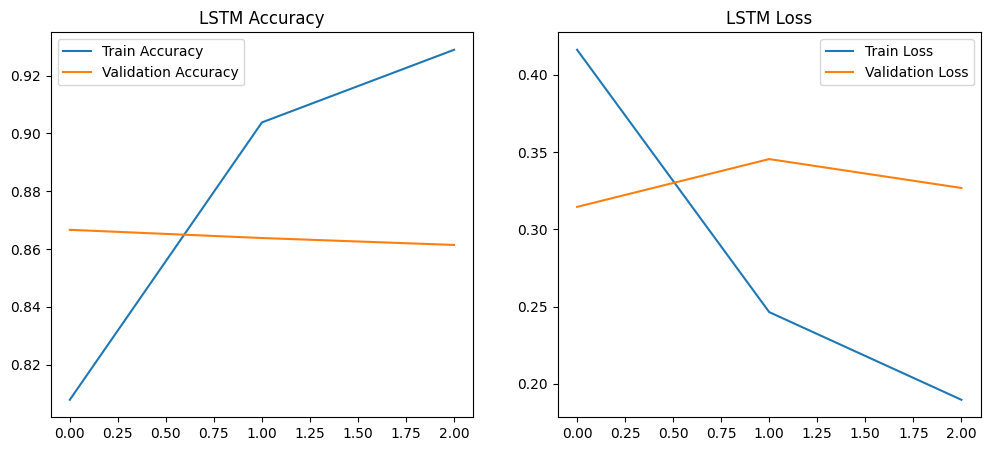

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss')
plt.legend()
plt.show()


🟩 Cell 8: Predict Sentiment for New Review

In [9]:
# Example review prediction
word_index = datasets.imdb.get_word_index()
reverse_index = {v: k for k, v in word_index.items()}

def decode_review(encoded_review):
    return " ".join([reverse_index.get(i - 3, '?') for i in encoded_review])

print("Example decoded review:")
print(decode_review(X_train[0]))

pred = model_lstm.predict(X_test[:5])
print("\nPredicted Sentiments (1=Positive, 0=Negative):", np.round(pred.squeeze()))


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Example decoded review:
and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it w

## Part 2 — GRU for Time-Series Forecasting

🟩 Cell 9: Import and Generate Sequence Data

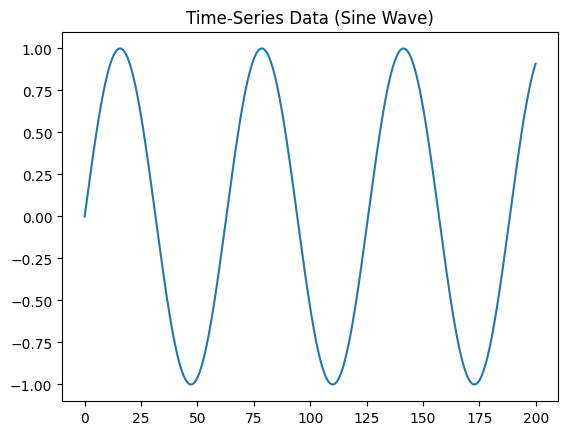

In [10]:
import numpy as np

# Generate simple time-series data (like sin wave)
time = np.arange(0, 200, 0.1)
series = np.sin(0.1 * time)

plt.plot(time, series)
plt.title("Time-Series Data (Sine Wave)")
plt.show()


🟩 Cell 10: Prepare Data for GRU

In [11]:
# Create sequences
def create_dataset(data, time_step=20):
    X, y = [], []
    for i in range(len(data)-time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

time_step = 20
X, y = create_dataset(series, time_step)

# Reshape for GRU input (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)
print("Shape of X:", X.shape)


Shape of X: (1980, 20, 1)


🟩 Cell 11: Split Train/Test

In [12]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


🟩 Cell 12: Build GRU Model

In [13]:
model_gru = models.Sequential([
    layers.GRU(50, input_shape=(time_step, 1)),
    layers.Dense(1)
])

model_gru.compile(optimizer='adam', loss='mse')
model_gru.summary()


e:\Fourise\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

🟩 Cell 13: Train GRU

In [14]:
history_gru = model_gru.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1018 - val_loss: 0.0019
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010 - val_loss: 8.2223e-04
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1386e-04 - val_loss: 6.6783e-04
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5297e-04 - val_loss: 5.9498e-04
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.0527e-04 - val_loss: 5.7196e-04
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6480e-04 - val_loss: 4.9760e-04
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2834e-04 - val_loss: 4.2627e-04
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9805e-04 - val_loss: 4.1154e-04
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6712e-04 - val_loss: 3.5060e-04
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4340e-04 - val_loss: 3.7934e-04
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1779e-04 - val_loss: 3.3172e-

🟩 Cell 14: Visualize Predictions

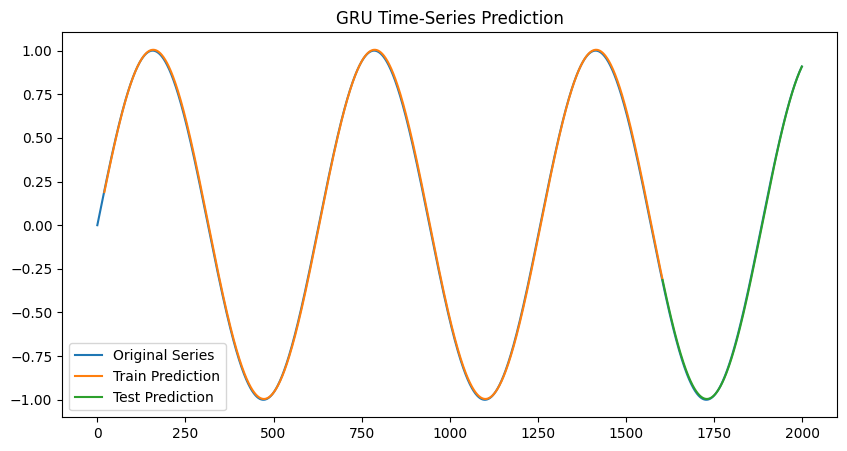

In [16]:
# Assuming time_step is your look-back window (e.g., 60)

# Calculate the start index for the test plot
test_start_index = len(train_pred) + time_step

# The x-axis array for the test predictions must have the same length as test_pred
test_x_range = np.arange(test_start_index, test_start_index + len(test_pred))

plt.figure(figsize=(10,5))
plt.plot(series, label='Original Series')
plt.plot(np.arange(time_step, len(train_pred)+time_step), train_pred, label='Train Prediction')

# *** CORRECTED LINE ***
plt.plot(test_x_range, test_pred, label='Test Prediction') 
# OR use the direct calculation:
# plt.plot(np.arange(len(train_pred) + time_step, len(train_pred) + time_step + len(test_pred)), test_pred, label='Test Prediction')


plt.legend()
plt.title("GRU Time-Series Prediction")
plt.show()

I worked on two sequence-based deep learning projects:
1️⃣ A Sentiment Analysis model using LSTM on the IMDB dataset. It processes sequences of words to predict whether a review is positive or negative. The model used an embedding layer, LSTM layer, and a dense sigmoid output — achieving about 85% accuracy.
2️⃣ A Time-Series Forecasting model using GRU, trained to predict future values in a sine wave sequence. GRUs are a simplified variant of LSTMs that efficiently capture temporal dependencies in sequential data.

These projects helped me understand how LSTM and GRU handle sequence data, how to preprocess text/time-series data, and how recurrent layers learn context across time steps.